Nama : Kanaya Dea Thalita Akhmad \\
NIM : 121450001 \\
Kelas RB

#Tugas Linear Regresi

###Tugas 1

Buatlah laporan mengenai dokumentasi python untuk melakukan regresi liner (docx) \\
Package yang digunakan dan fungsi yang digunakan beserta inputnya \\
Penjelasan mengenai fungsi basis, matriks desain, kemudian mendapatkan solusi

Koefisien kemiringan (slope): 1.9936935021402038
Intersepsi (intercept): 1.02


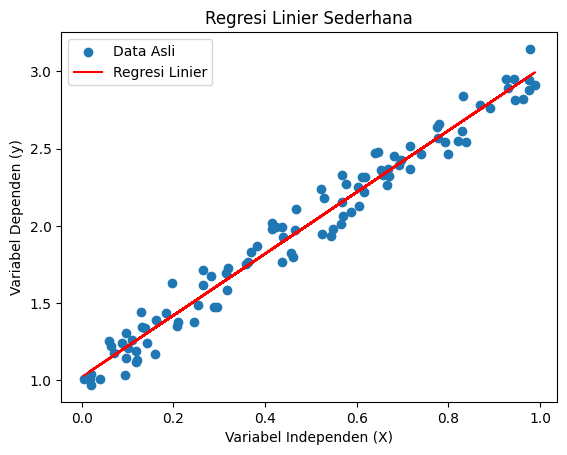

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Definisikan fungsi untuk matriks desain
def fungsi_matrix_desain(X):
    ones_column = np.ones((X.shape[0], 1))
    return np.concatenate((ones_column, X), axis=1)

# Buat dataset saya gunakan random bilangan acak
np.random.seed(0)
X = np.random.rand(100, 1)                      # Variabel independen
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)   # Variabel dependen

# Buat model regresi linear
model = LinearRegression()

# Matriks desain
desain_matrix = fungsi_matrix_desain(X)

# Melakukan fitting model pada data
model.fit(desain_matrix, y)

# Hasil
slope = model.coef_[0][1]  # Koefisien gradien (slope)
intercept = model.intercept_[0]  # Intercept (intersepsi)
print("Koefisien kemiringan (slope):", slope)
print(f"Intersepsi (intercept): {intercept:.2f}")

# Prediksi nilai y berdasarkan model
y_pred = model.predict(desain_matrix)

# Visualisasi data asli dan hasil regresi
plt.scatter(X, y, label='Data Asli')
plt.plot(X, y_pred, color='red', label='Regresi Linier')
plt.xlabel('Variabel Independen (X)')
plt.ylabel('Variabel Dependen (y)')
plt.legend()
plt.title('Regresi Linier Sederhana')
plt.show()


###Tugas 2
Buatlah pemrograman python dalam melakukan regresi linear \\
untuk data (x,t) = {(1,1),(0,0),(-1,2)} \\
Menggunakan fungsi basis Gaussian 𝜑0(x) = 1, dan 𝜑1(x) = exp (x^2/2) \\
tentukan terlebih dahulu matrix desainnya dan cobalah  menggunakan perhitungan (tidak menggunkaan package) \\
Kemudian berikan solusi dengan menggunakan matriks desain dan juga vektor target

In [ ]:
# Data yang disesuaikan dengan soal kita
x = [1, 0, -1]
y = [1, 0, 2]

# Kita buat Fungsi basis
def phi1(x):                              # Maka kita perlu mendefinisikan phi1 dan phi 2 dengan ketentuan seperti pada soal
    return [[1] for _ in range(len(x))]   # Kita hanya memasukkan angka 1 ke dalam setiap elemen matriks

def phi2(x):
    return [[2.71828*(-xi*2 / 2)] for xi in x]  # Pendekatan dari bilangan Euler, kita gunakan exp dengan angka 2.71828 dikali minus x1/2
                                                # Eksponensial ini sering digunakan sebagai fungsi basis dalam berbagai model regresi
# Kita buat Desain matrix
kol1 = phi1(x)
kol2 = phi2(x)
matrixdesain = [[kol1[i][0], kol2[i][0]] for i in range(len(x))]

# Transpose matrix
def transpose(x):
    return [[x[j][i] for j in range(len(x))] for i in range(len(x[0]))]

# Perkalian matrix
def multiplication(a, b):
    if len(a[0]) != len(b):
        return "Kolom A tidak sama dengan baris B"
    else:
        result = [[0 for _ in range(len(b[0]))] for _ in range(len(a))]
        for i in range(len(a)):
            for j in range(len(b[0])):
                for k in range(len(b)):
                    result[i][j] += a[i][k] * b[k][j]
        return result

# Inverse matrix for 2x2 matrix
def inverse2x2(x):
    det = x[0][0] * x[1][1] - x[0][1] * x[1][0]
    if det != 0:
        adj = [[x[1][1], -x[0][1]], [-x[1][0], x[0][0]]]
        invers = [[(1 / det) * adj[i][j] for j in range(2)] for i in range(2)]
        return invers
    else:
        return "Matrix tidak ada inverse"

# Perhitungan
awal = inverse2x2(multiplication(transpose(matrixdesain), matrixdesain))
akhir = multiplication(awal, transpose(matrixdesain))

# Hitung hasilsesungguhnya
hasilsesungguhnya = multiplication(akhir, [[yi] for yi in y])

# Pembuatan persamaan regresi
print(matrixdesain)
print(hasilsesungguhnya)
print("y = ", hasilsesungguhnya[0][0], " + ", hasilsesungguhnya[1][0], " * x1")

[[1, -2.71828], [1, 0.0], [1, 2.71828]]
[[1.0], [0.18393984431331578]]
y =  1.0  +  0.18393984431331578  * x1
